In [1]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb,display_map
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
import matplotlib as mpl

dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m","B05_20m","B11_20m","B12_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1290 1267 1264 1252
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1612 1575 1578 1531
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1524 1468 1525 1489
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1136 1137 1138 1150
    B05_20m      (time, y, x) uint16 2538 2521 2488 2506 ... 1248 1200 1228 1218
    B11_20m      (time, y, x) uint16 2530 2521 2499 2485 ... 1092 1092 1091 1089
    B12_20m      (time, y, x) uint16 1666 1668 1656 1637 ... 1069 1068 1070 1068
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


In [2]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08_10m - dataset.B03_10m
band_sum = dataset.B11_20m - dataset.B03_10m

# Calculate NDVI and store it as a measurement in the original dataset
mvi = band_diff / band_sum
print(mvi)

<xarray.DataArray (time: 2, y: 427, x: 757)>
array([[[4.897638  , 4.821363  , 4.5473485 , ..., 0.6498708 ,
         1.030181  , 0.6833013 ],
        [5.4095635 , 5.950783  , 4.672662  , ..., 0.92960286,
         0.8566434 , 0.88301885],
        [6.5824466 , 6.941003  , 3.5650117 , ..., 0.7591093 ,
         0.9030172 , 0.56916994],
        ...,
        [0.6662844 , 0.590743  , 0.5971686 , ..., 0.6605128 ,
         0.70109236, 0.6699801 ],
        [0.60812426, 0.61348313, 0.7239819 , ..., 0.6370143 ,
         0.7796208 , 0.62072074],
        [0.5871886 , 0.5811578 , 0.5689655 , ..., 0.6439318 ,
         0.5535836 , 0.7332636 ]],

       [[5.5796814 , 5.8378906 , 5.6718144 , ..., 0.7937672 ,
         0.8086681 , 0.64181817],
        [6.585837  , 6.229122  , 5.8995986 , ..., 0.7144279 ,
         0.90179515, 0.6798365 ],
        [6.3994913 , 6.9016395 , 4.715818  , ..., 0.84891164,
         0.8313253 , 0.524     ],
        ...,
        [0.85026044, 0.8438762 , 0.9170243 , ..., 0.8607843 ,
 

<Figure size 800x800 with 0 Axes>

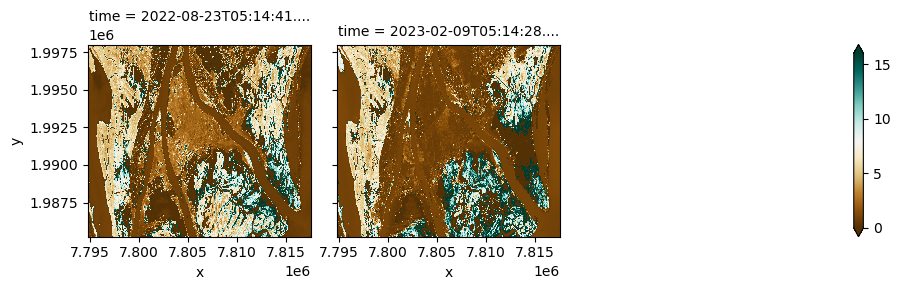

In [3]:
plt.figure(figsize=(8, 8))
mvi.plot(col='time', cmap="BrBG", vmin=0, vmax=16, col_wrap=3)
plt.show()

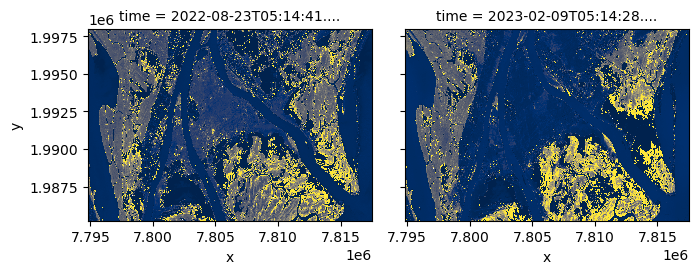

In [4]:
# plt.figure(figsize=(8, 8))
# # Define the colors for your custom colormap
# cmap_colors = ['#556B2F', '#556B2F', '#EAE711']
# #556B2F #EAE711
# # Create a custom colormap with the specified colors
# cmap = colors.ListedColormap(cmap_colors)

# # Define the color bounds for your colormap
# bounds = [0, 2, 6, 18]

# # Set the tick positions for the colorbar
# ticks = [0, 2, 6, 18]

# # Set the label for the colorbar
# label = 'Values'
mvi.plot(col='time', cmap='cividis', vmin=0 ,vmax=16.5, add_colorbar=False)
plt.show()

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr

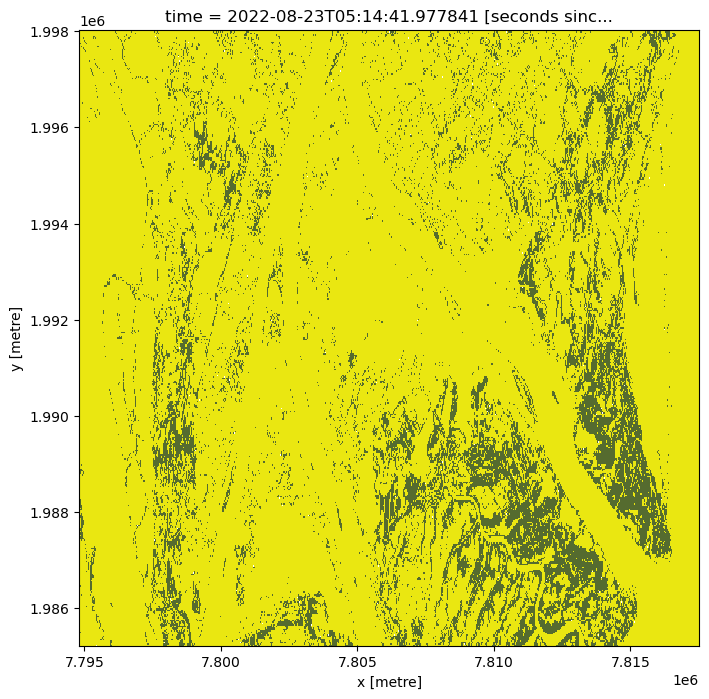

In [6]:
# Define the colors for your custom colormap
cmap_colors = ['#EAE711', '#556B2F']

# Create a custom colormap with the specified colors
cmap = colors.ListedColormap(cmap_colors)

# Define the color bounds for your colormap
bounds = [0, 4, 16]

# Set the tick positions for the colorbar
ticks = [0, 4, 16]

# Set the label for the colorbar
label = 'Values'

# Plot the data using your custom colormap and colorbar settings
fig, ax = plt.subplots(figsize=(8, 8))
# for t in range(len(mvi.time)):
im = mvi.isel(time=0).plot.imshow(ax=ax, cmap=cmap, vmin=0, vmax=16.5, add_colorbar=False)
# add any additional plot customization here
plt.show()  # display the plot for each time step
im = mvi.isel(time=1).plot.imshow(ax=ax, cmap=cmap, vmin=0, vmax=16.5, add_colorbar=False)
plt.show()
cbar = fig.colorbar(im, ax=ax, ticks=ticks, boundaries=bounds, label=label)

# Show the plot
plt.show()